<a href="https://colab.research.google.com/github/Mo-Shaeerah/Predict-COVID-19-By-NN/blob/main/COVID_19_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

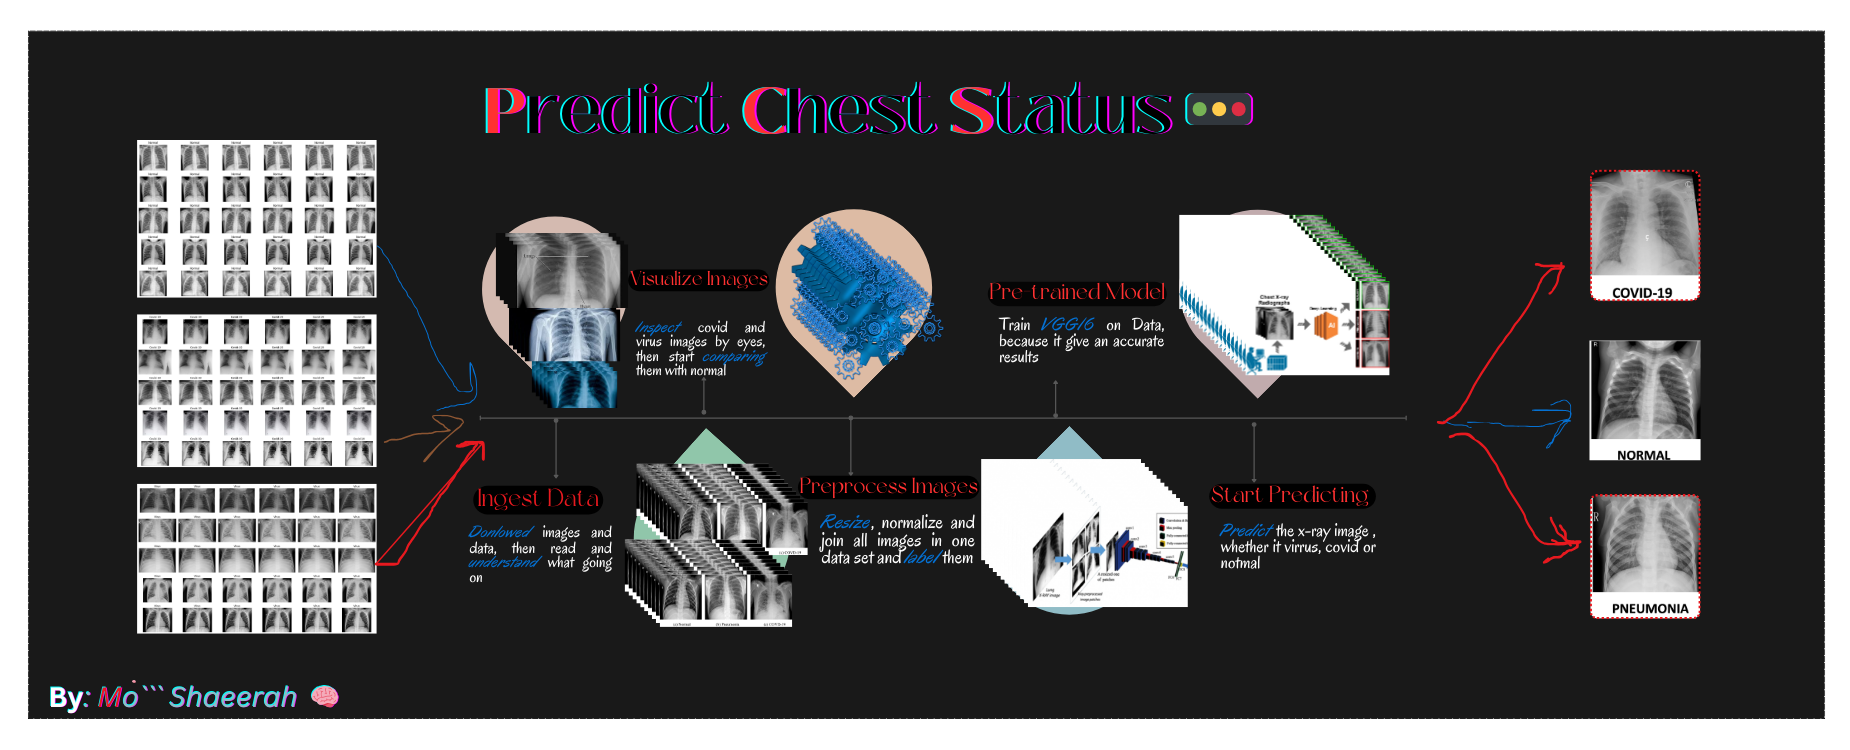

# `0- Install & Downloading data by code 🔻🔻`

In [ ]:
# > /dev/null, make the code run without displaying output

!pip install kaggle > /dev/null
!pip install visualkeras > /dev/null

In [ ]:
# Move the uploaded kaggle.json file to the appropriate location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using the Kaggle API
!kaggle competitions download -c copy-of-shai-level-2-training

 97% 512M/526M [00:02<00:00, 187MB/s]
100% 526M/526M [00:02<00:00, 194MB/s]


In [ ]:
!unzip copy-of-shai-level-2-training.zip -d /content/Chest-X-ray-Files/ > /dev/null

# `1- Bring Libraries 📞📞`

In [ ]:
# Import Or activate tools & libraries

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt, tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os, cv2, numpy as np, pandas as pd, seaborn as sns,   visualkeras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# Avoid future Warnings
import warnings
warnings.filterwarnings('ignore')

# `2- Read, understand & Interpret data 🔍❗`

In [ ]:
Main_path = 'Chest-X-ray-Files/'

train = pd.read_csv(Main_path + 'train.csv')

display(
    train.sample(5),
    ('-------------------------'),

    train.shape,
    ('-------------------------'),

    train.info(),
    ('-------------------------'),

    train.describe(),
    ('-------------------------'),

    train.keys(),
    ('-------------------------'),

    train.Label.unique()
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   1196 non-null   object
 1   Label   1196 non-null   object
dtypes: object(2)
memory usage: 18.8+ KB


,Image,Label
1074,20419009.jpeg,normal
958,284810842.jpeg,virus
642,120305668.jpg,covid
59,271227309.png,covid
849,76914797.jpeg,normal


'-------------------------'

(1196, 2)

'-------------------------'

None

'-------------------------'

,Image,Label
count,1196,1196
unique,1196,3
top,597631776.jpeg,normal
freq,1,468


'-------------------------'

Index(['Image', 'Label'], dtype='object')

'-------------------------'

array(['normal', 'virus', 'covid'], dtype=object)

In [ ]:
sample = pd.read_csv(Main_path + 'sample_submission.csv')

sample[:4]

,Image,Label
0,402124007.png,NaN
1,20328626.jpeg,NaN
2,21235419.jpeg,NaN
3,188238579.png,NaN


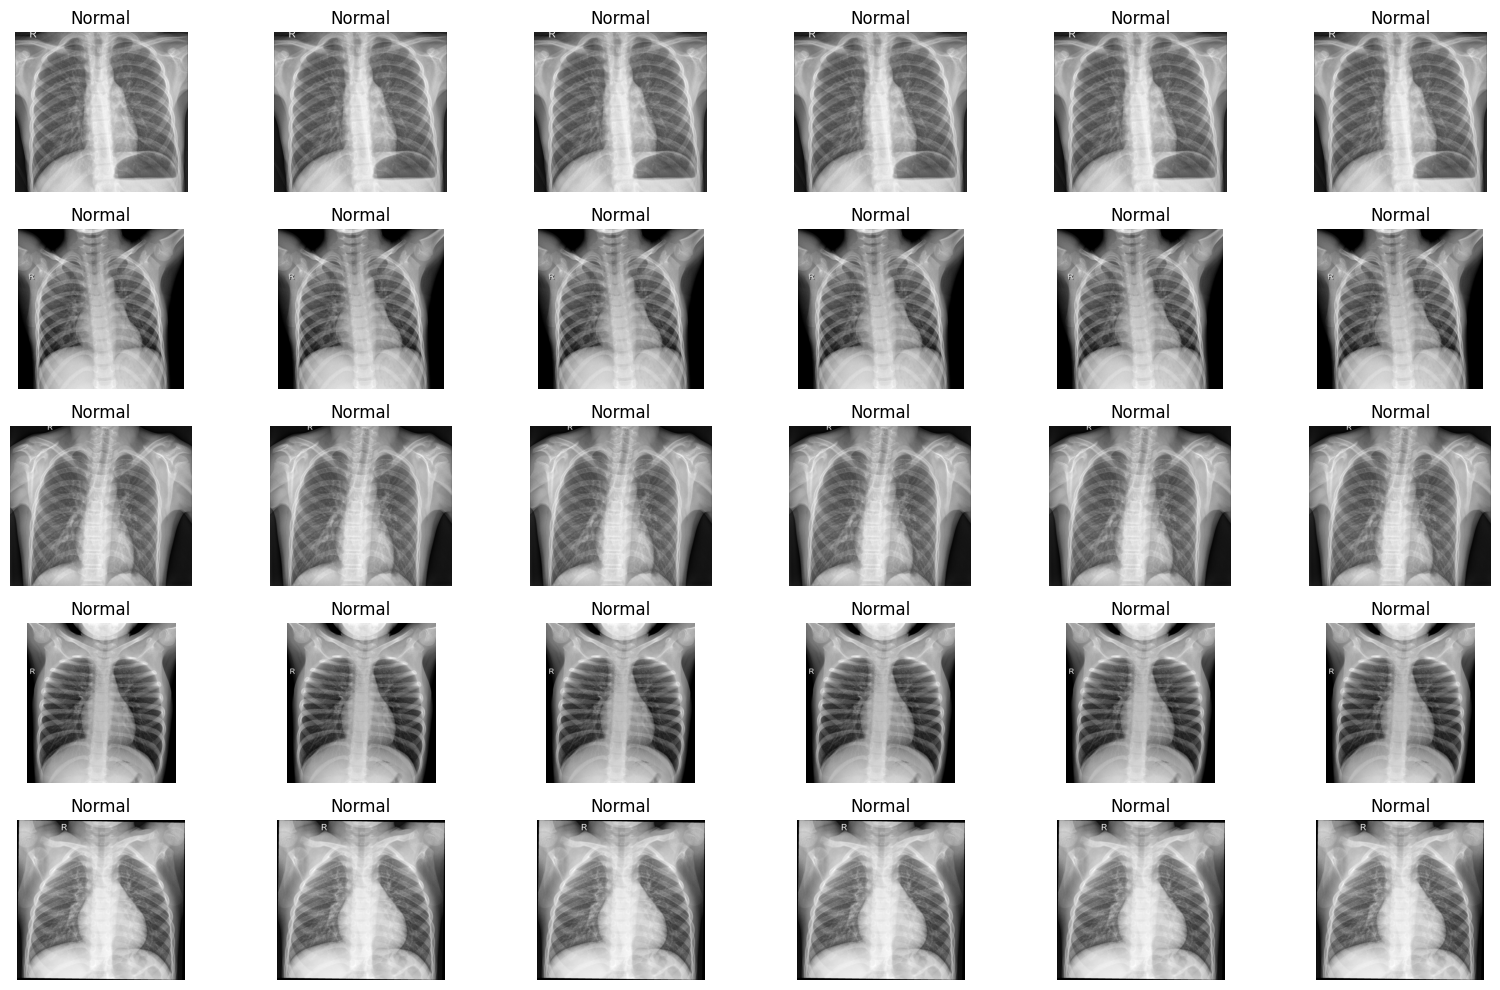

In [ ]:
# Let's display Normal Chest X-ray

Normal_url = Main_path + "/train/normal/"

rows = 5
columns = 6

normal = os.listdir(Normal_url)
fig, ax = plt.subplots(rows, columns, figsize=(16, 10))

for row in range(rows):

  for col in range(columns):
    image = plt.imread(Normal_url + normal[row])
    ax[row, col].imshow(image, cmap='gray')
    ax[row, col].axis('off')
    ax[row, col].set_title('Normal')

plt.tight_layout()
plt.show()

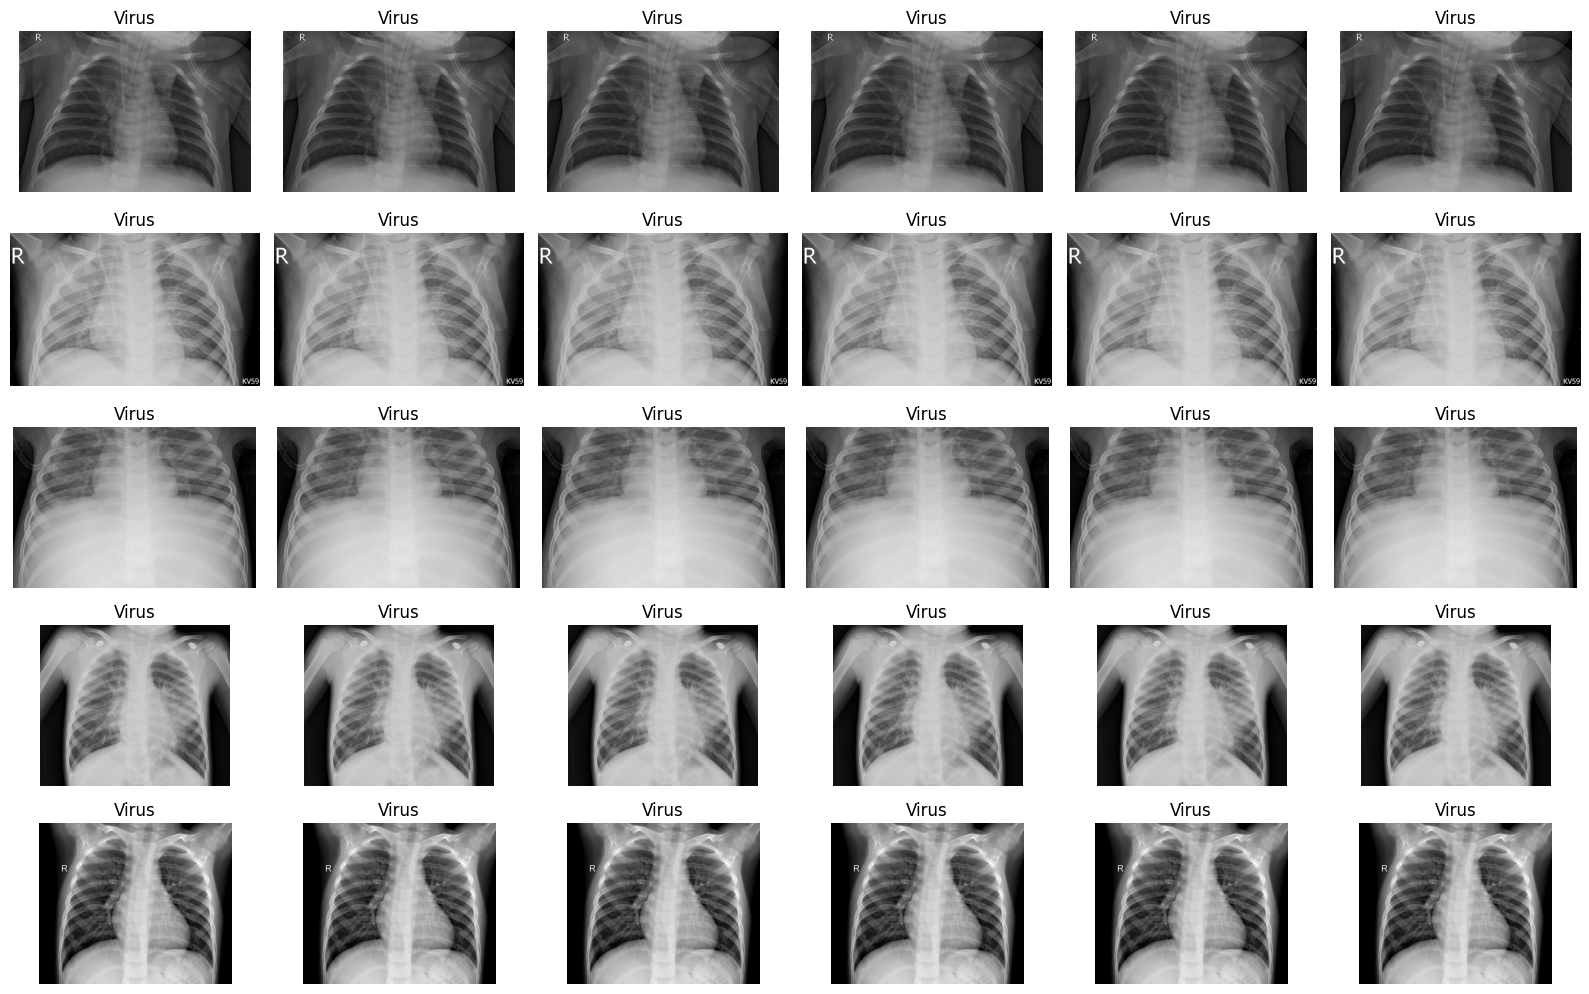

In [ ]:
# Let's display Virus Chest X-ray

Virus_url = Main_path + "/train/virus/"

rows = 5
columns = 6

virus = os.listdir(Virus_url)
fig, ax = plt.subplots(rows, columns, figsize=(16, 10))

for row in range(rows):

  for col in range(columns):
    image = plt.imread(Virus_url + virus[row])
    ax[row, col].imshow(image, cmap='gray')
    ax[row, col].axis('off')
    ax[row, col].set_title('Virus')

plt.tight_layout()
plt.show()

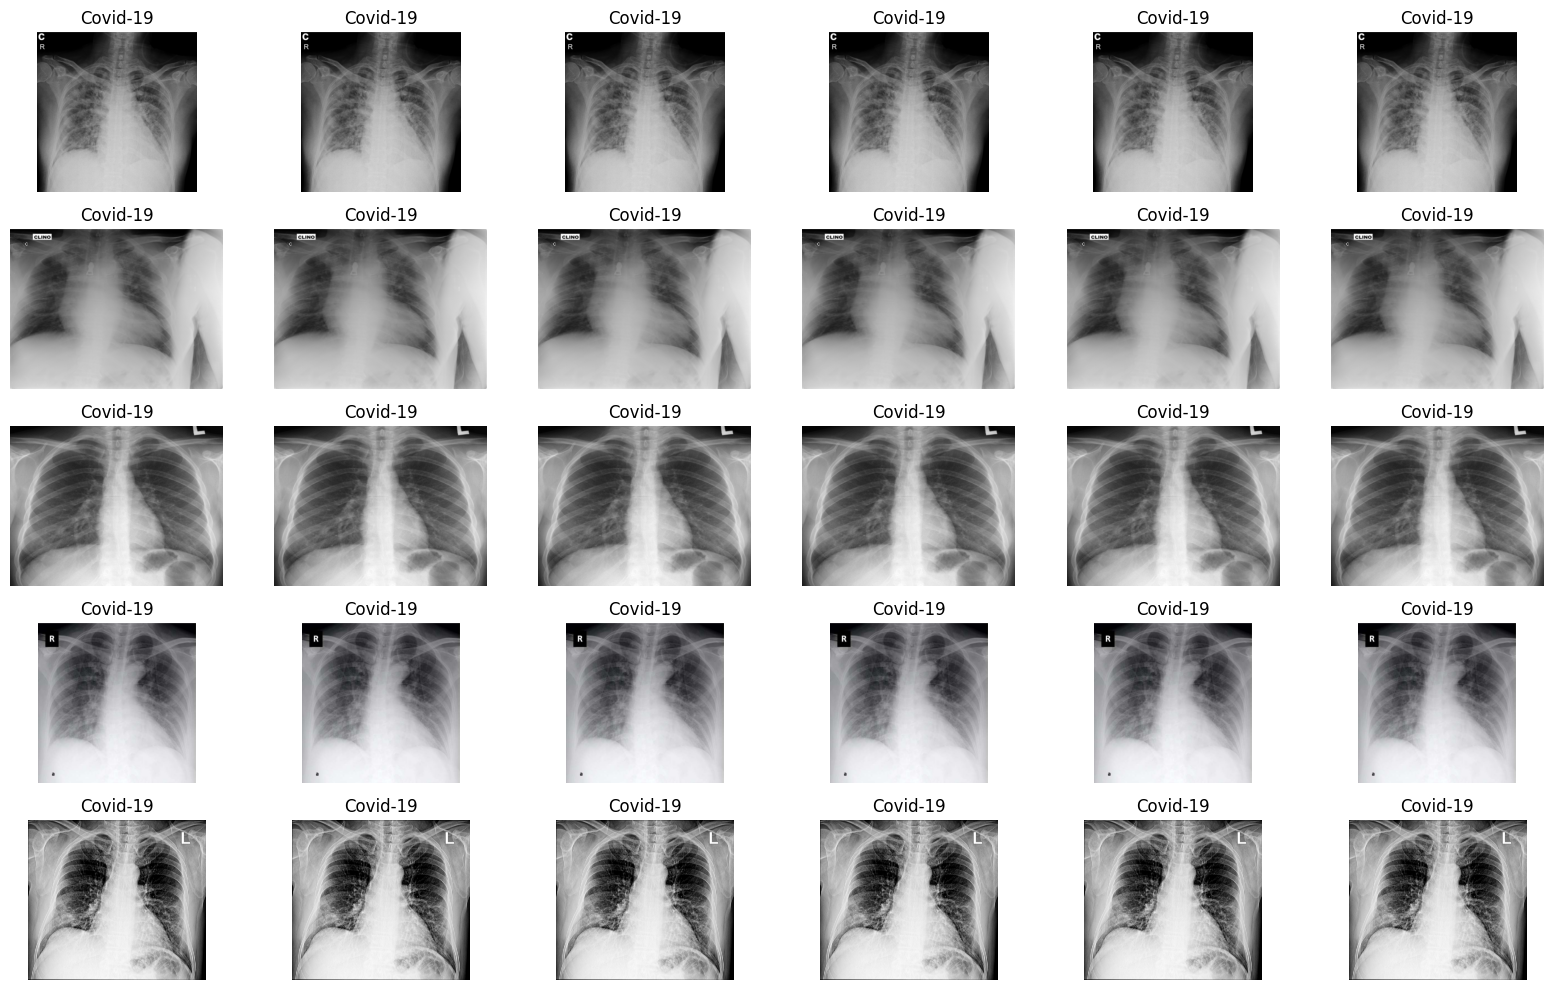

In [ ]:
# Let's display COVID-19 Chest X-ray

Covid_url = Main_path + "/train/covid/"

rows = 5
columns = 6

covid = os.listdir(Covid_url)
fig, ax = plt.subplots(rows, columns, figsize=(16, 10))

for row in range(rows):

  for col in range(columns):
    image = plt.imread(Covid_url + covid[row])
    ax[row, col].imshow(image, cmap='gray')
    ax[row, col].axis('off')
    ax[row, col].set_title('Covid-19')

plt.tight_layout()
plt.show()

# `3- Preprocess data & preper it for modeling station 💉💉`

In [ ]:
# Do empty list for data & labels
data = []
labels = []

# Handle covid images
covid = os.listdir(Covid_url)
for a in covid:
    image = cv2.imread(Covid_url+a,)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(0)

# Handle Normal images
normal = os.listdir(Normal_url)
for b in normal:
    image = cv2.imread(Normal_url +b,)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(1)

# Handle Virus images
virus=os.listdir(Virus_url)
for c in virus:
    image = cv2.imread(Virus_url+c,)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(2)


display(
    len(data),

    len(labels)
)

1196

1196

In [ ]:
# Make data and its labels in numpy format
X_data , y_data= np.array(data) / 255.0,  np.array(labels)

# Check shape
display(
    X_data.shape, y_data.shape
    )

(1196, 224, 224, 3)

(1196,)

In [ ]:
# Split the data into training and validation sets (80% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=y_data, test_size=0.25, random_state=42)

# Print the shapes of the training and validating sets
for data, name in [(X_train, 'X_train'), (y_train, 'y_train'), (X_val, 'X_val'), (y_val, 'y_val')]:
    print(f"{name} shape:", data.shape)

X_train shape: (897, 224, 224, 3)
y_train shape: (897,)
X_val shape: (299, 224, 224, 3)
y_val shape: (299,)


In [ ]:
# Handle the classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=3)

display(
    y_train.shape, y_val.shape
    )

(897, 3)

(299, 3)

# `4- Do modeling by transfer learning 🦅🦅`

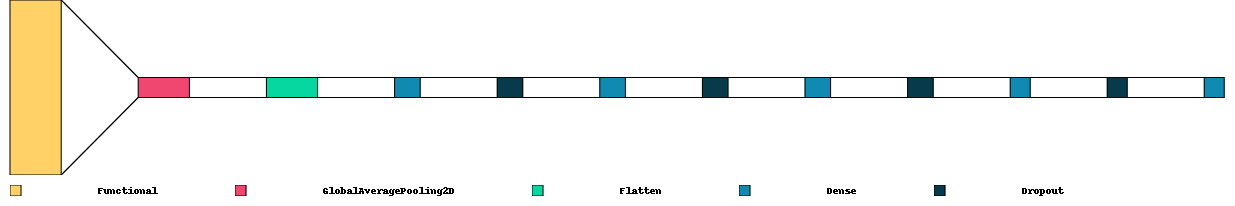

In [ ]:
# Load pre-trained VGG16 model without the top (classification) layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers so they're not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
pre_model = Sequential([
    base_model,

    GlobalAveragePooling2D(),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(3, activation='softmax')
])

# Visualize NN architecture
visualkeras.layered_view(pre_model, legend=True, scale_xy=25, draw_funnel=True, draw_volume=False, spacing=77)

In [ ]:
# Compile the pre_trained model
pre_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights = True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', verbose=1)

# Train the model
history = pre_model.fit(X_train,
                        y_train,
                        verbose=1,
                        epochs=50,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping, model_checkpoint],
                        )

# Load the best model
pre_model.load_weights('best_model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = pre_model.evaluate(X_val, y_val)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
28/29 [===========================>..] - ETA: 0s - loss: 1.1323 - accuracy: 0.3493
Epoch 1: val_loss improved from inf to 1.06340, saving model to best_model.h5
29/29 [==============================] - 9s 202ms/step - loss: 1.1321 - accuracy: 0.3489 - val_loss: 1.0634 - val_accuracy: 0.3612
Epoch 2/50
28/29 [===========================>..] - ETA: 0s - loss: 1.1040 - accuracy: 0.4007
Epoch 2: val_loss improved from 1.06340 to 1.04755, saving model to best_model.h5
29/29 [==============================] - 5s 172ms/step - loss: 1.1037 - accuracy: 0.4002 - val_loss: 1.0475 - val_accuracy: 0.3612
Epoch 3/50
28/29 [===========================>..] - ETA: 0s - loss: 1.0995 - accuracy: 0.3828
Epoch 3: val_loss improved from 1.04755 to 1.03458, saving model to best_model.h5
29/29 [==============================] - 5s 175ms/step - loss: 1.0993 - accuracy: 0.3835 - val_loss: 1.0346 - val_accuracy: 0.3712
Epoch 4/50
28/29 [===========================>..] - ETA: 0s - loss: 1.0594 - accura

# `5- Check model Performance & Accuracy 🏋️‍♂️🏋️‍♂️`

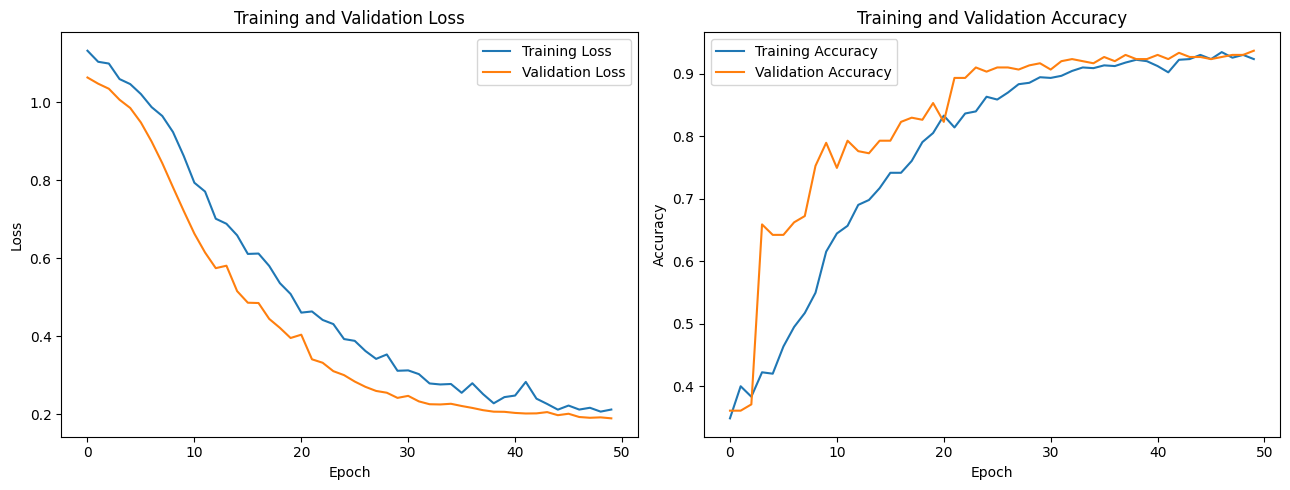

In [ ]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Plot training and validation loss
for ax, data_type in zip(axes, [('loss', 'Training Loss', 'Validation Loss'),
                                 ('accuracy', 'Training Accuracy', 'Validation Accuracy')]):

  ax.plot(history.history[data_type[0]], label=data_type[1])
  ax.plot(history.history[f'val_{data_type[0]}'], label=data_type[2])
  ax.set_title(f'Training and Validation {data_type[1].split()[1]}')
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss' if data_type[0] == 'loss' else 'Accuracy')
  ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Classification Report

y_val = np.argmax(y_val, axis=1)
model_predict, = pre_model.predict(X_val),
model_predict = np.argmax(model_predict, axis=1)

print(classification_report(y_val, model_predict))

10/10 [==============================] - 1s 124ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        74
           1       0.91      0.97      0.94       117
           2       0.95      0.88      0.91       108

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



In [ ]:
# Confusion matrix in a data frame format
pd.DataFrame(confusion_matrix(y_val, model_predict), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,72,1,1
normal,0,113,4
virus,3,10,95


# `6- Testing And submission part 📥📤`

In [ ]:
# Test images directory
test_url = Main_path + 'test/'

# Define target size for resizing
target_size = (224, 224)

# Initialize list to store preprocessed test images
test_images_preprocessed = []

# Load and preprocess test images
for filename in os.listdir(test_url):

    image = cv2.imread(os.path.join(test_url, filename))

    if image is not None:
        resized_image = cv2.resize(image, target_size)
        normalized_image = resized_image / 255.0  # Normalize pixel values
        test_images_preprocessed.append(normalized_image)

# Convert list of preprocessed images to numpy array
test_data = np.array(test_images_preprocessed)

test_data.shape

(513, 224, 224, 3)

In [ ]:
# Make predictions on the preprocessed test images
predictions = pre_model.predict(test_data)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Assuming you have a mapping of class indices to class labels
class_labels = {0: 'normal', 1: 'virus', 2: 'covid'}

# Convert predicted class indices to class labels
predicted_class = [class_labels[label] for label in predicted_labels]

#
sample['Label'] = predicted_class

sample

17/17 [==============================] - 2s 119ms/step


,Image,Label
0,402124007.png,normal
1,20328626.jpeg,normal
2,21235419.jpeg,covid
3,188238579.png,virus
4,266831585.jpeg,covid
...,...,...
508,232629532.jpeg,virus
509,256499192.jpeg,normal
510,223507116.jpeg,normal
511,178434487.jpeg,covid


In [ ]:
sample.to_csv('COVID-19_Detection.csv', index=False)